**Oasis Infobyte**

**Batch - August Batch**

**Data Science Internship**

**Task 5: Sales Prediction Using Python**

**Intern Name: Soumalya Bhattacharyya**

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import pickle
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from colorama import Fore, Back, Style
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 5)

In [6]:
df.size

1000

In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.drop(columns="Unnamed: 0",inplace=True)

In [11]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [15]:
df.corr()["Sales"].sort_values()

Newspaper    0.228299
Radio        0.576223
TV           0.782224
Sales        1.000000
Name: Sales, dtype: float64

**HEAT MAP**

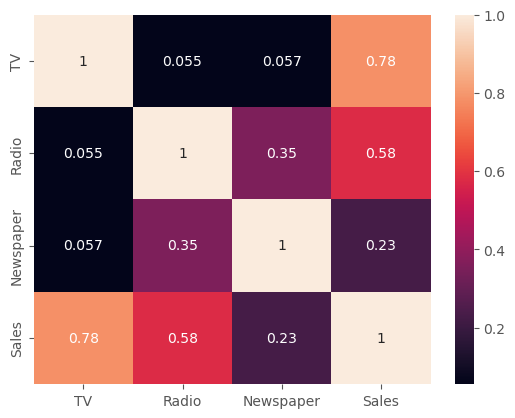

In [16]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

**BOX PLOT**

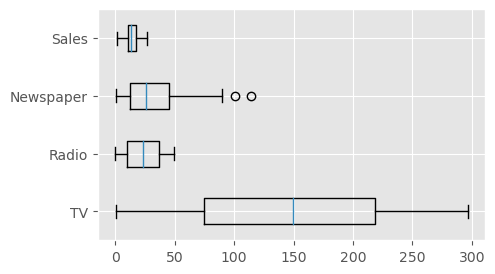

In [17]:
plt.figure(figsize=[5,3])
plt.boxplot(df,vert=False,data=df,labels=df.columns)
plt.show()

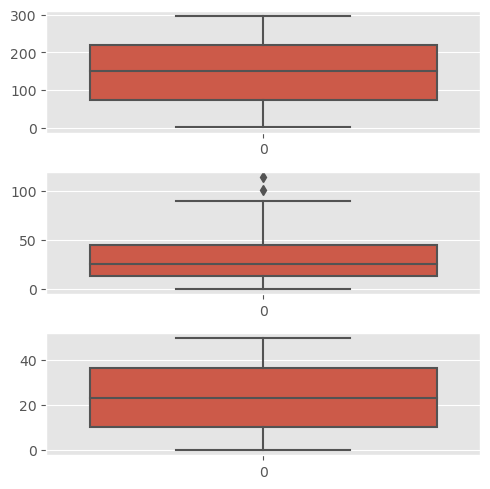

In [18]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

**DISTRIBUTION PLOT AND BOX PLOT**

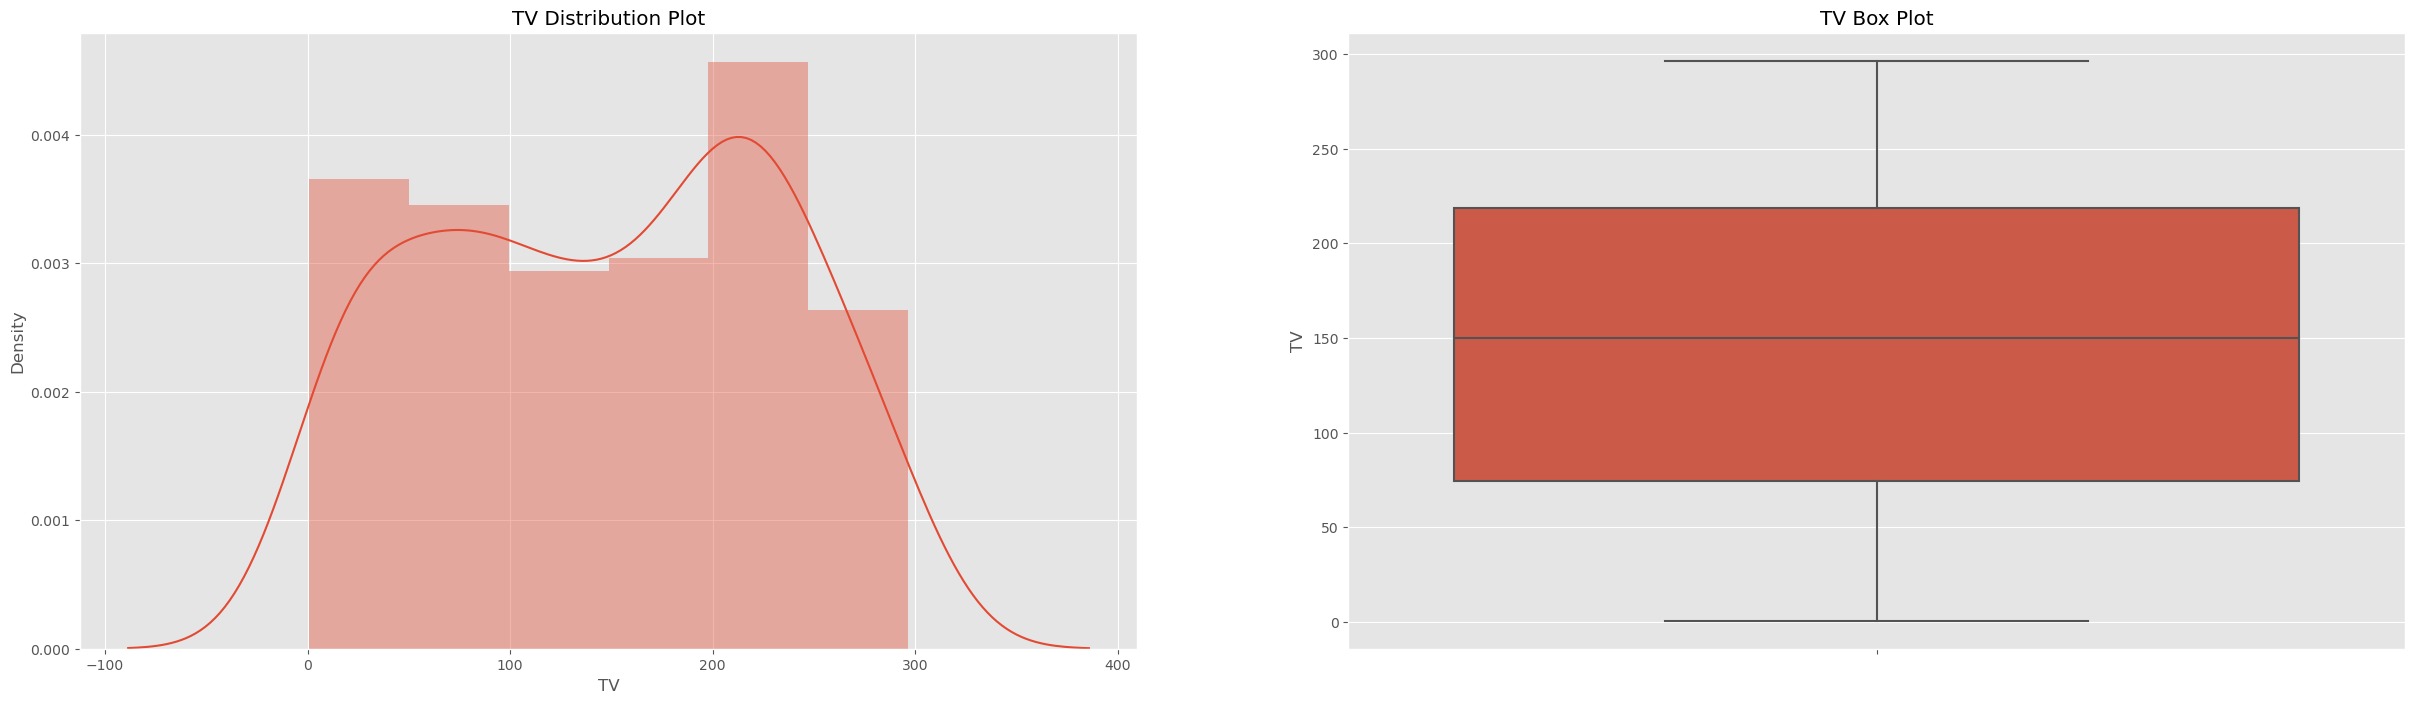

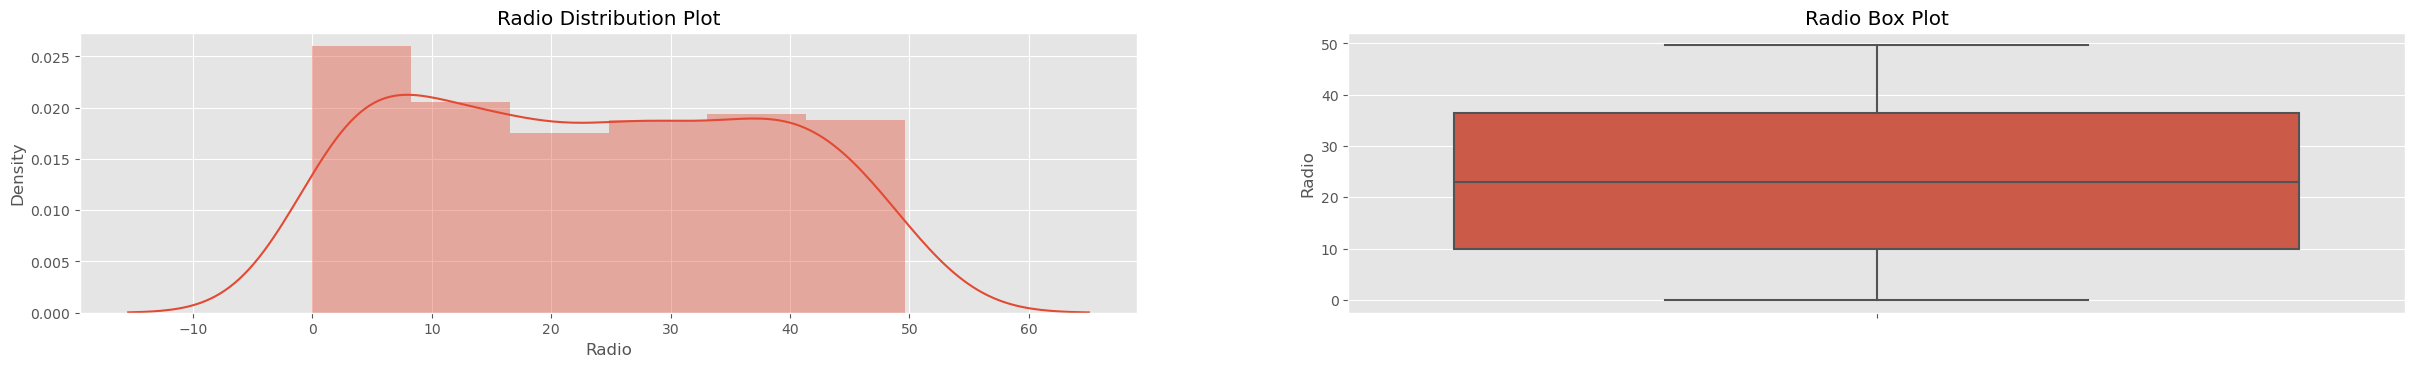

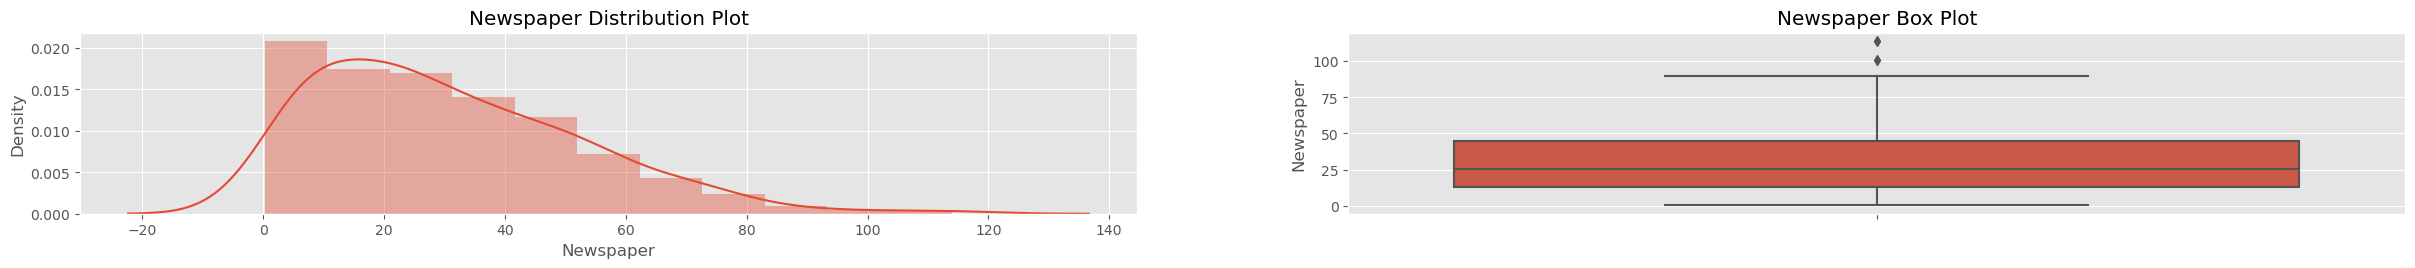

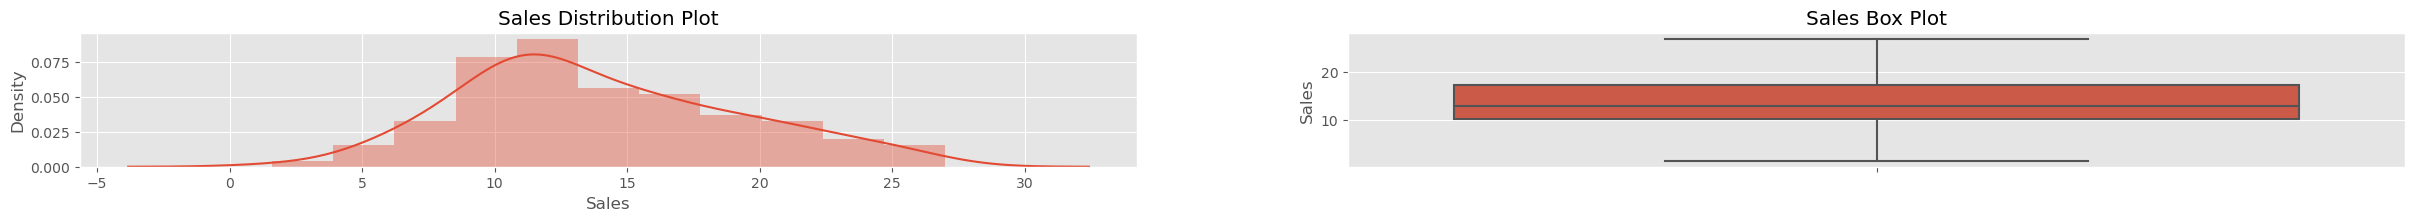

In [19]:
# Let's find the distribution of each of these numerical features and also check for outliers
index = 1
for feature in df.columns:
    plt.figure(figsize=(30,8))
    
    #first plot
    plt.subplot(index,2,1)
    plt.title(feature+" Distribution Plot")
    sns.distplot(df[feature])
    
    # second plot
    plt.subplot(index,2,2)
    plt.title(feature+" Box Plot")
    sns.boxplot(y=df[feature])
    
    index+=1
    plt.show()

**DISTRIBUTION PLOT**

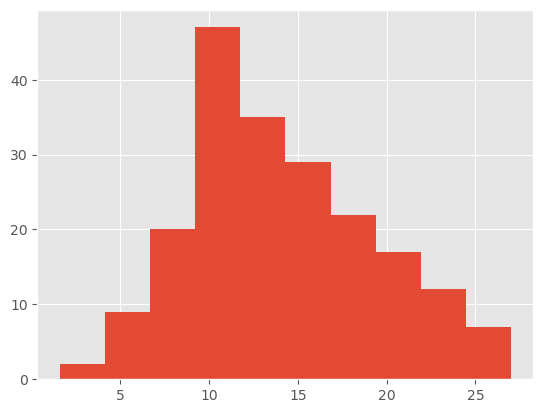

In [20]:
plt.hist(df['Sales'])
plt.show()

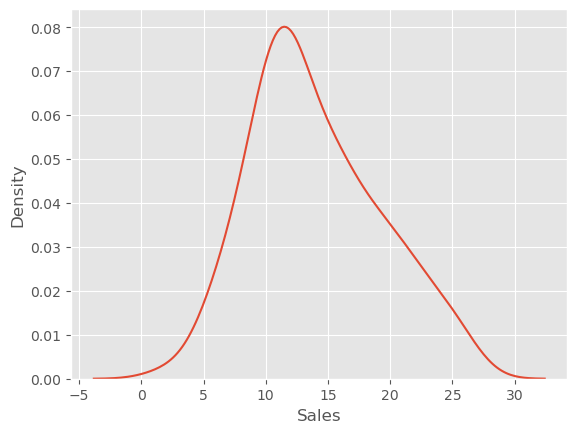

In [21]:
sns.distplot(df['Sales'],hist=False)
plt.show()

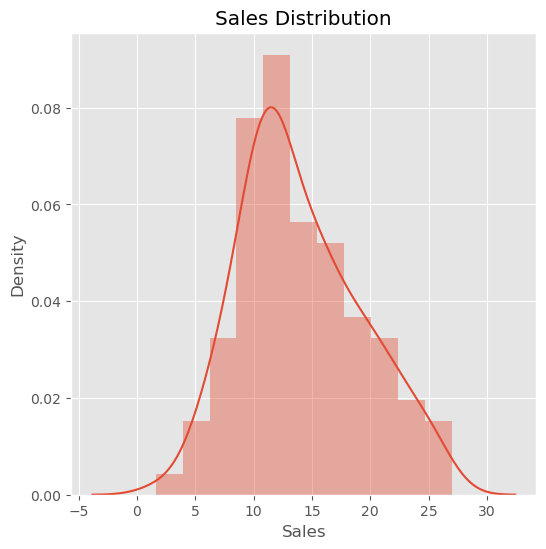

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(df['Sales'])
plt.title('Sales Distribution')
plt.show()

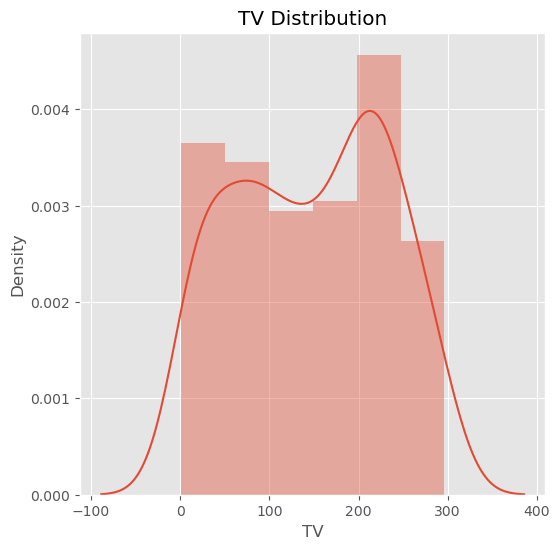

In [23]:
plt.figure(figsize=(6,6))
sns.distplot(df['TV'])
plt.title('TV Distribution')
plt.show()

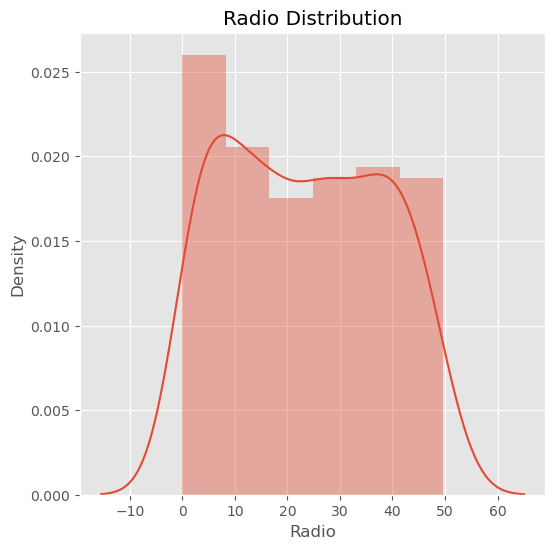

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(df['Radio'])
plt.title('Radio Distribution')
plt.show()

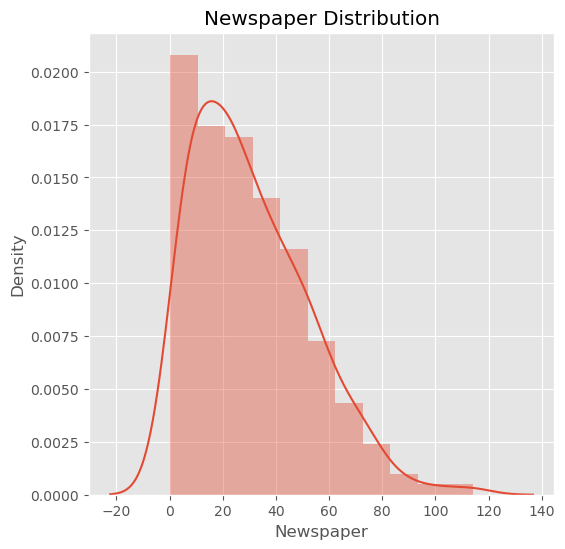

In [25]:
plt.figure(figsize=(6,6))
sns.distplot(df['Newspaper'])
plt.title('Newspaper Distribution')
plt.show()

**PAIR PLOT**

<Figure size 800x500 with 0 Axes>

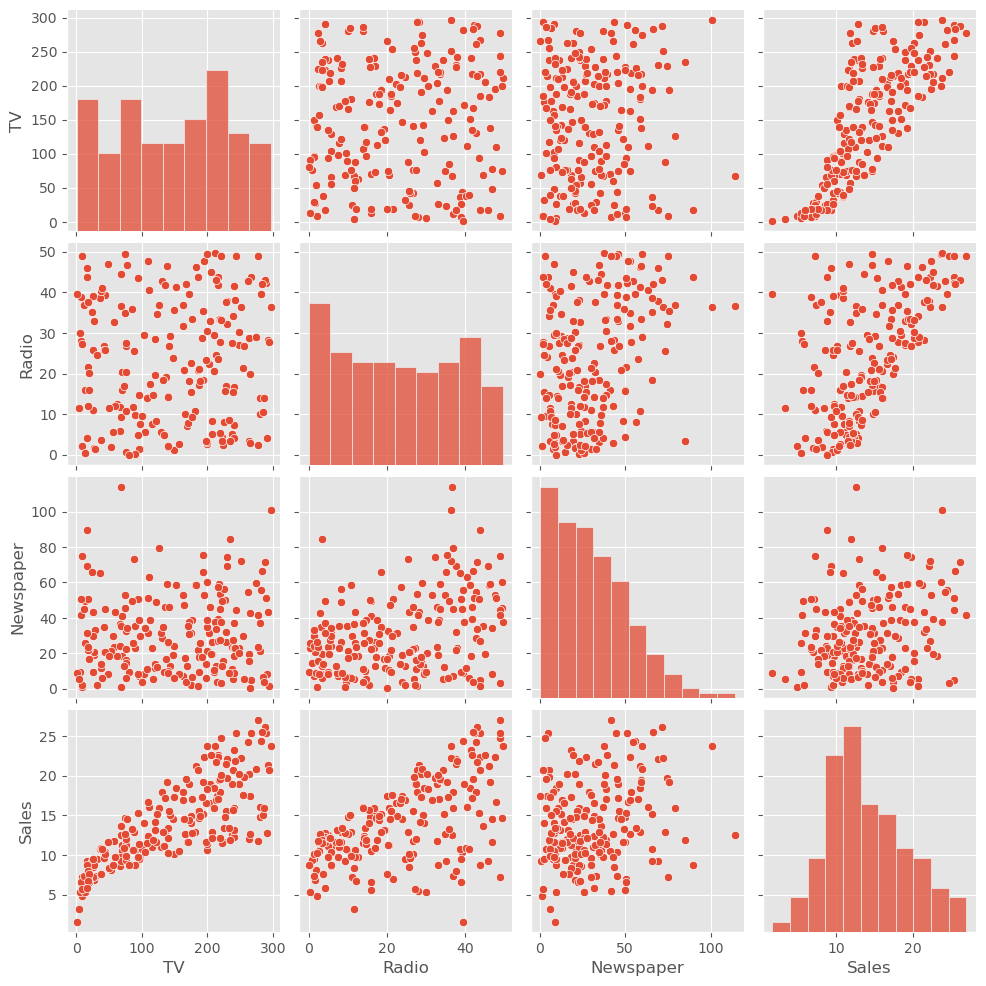

In [26]:
#Pair plot for all features 
plt.figure(figsize=(8,5),dpi=100)
sns.pairplot(df)

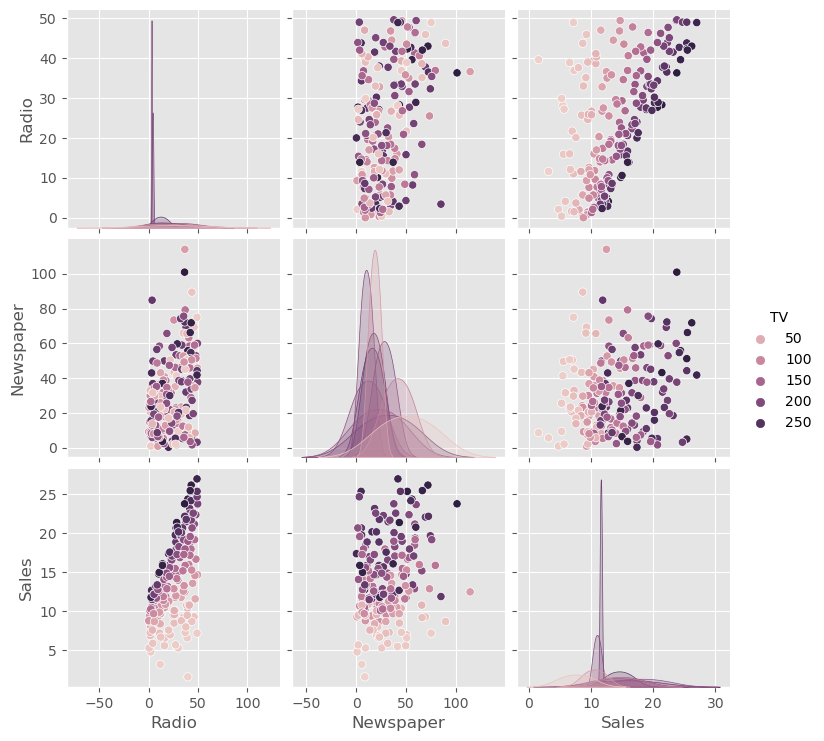

In [27]:
sns.pairplot(df,hue='TV')

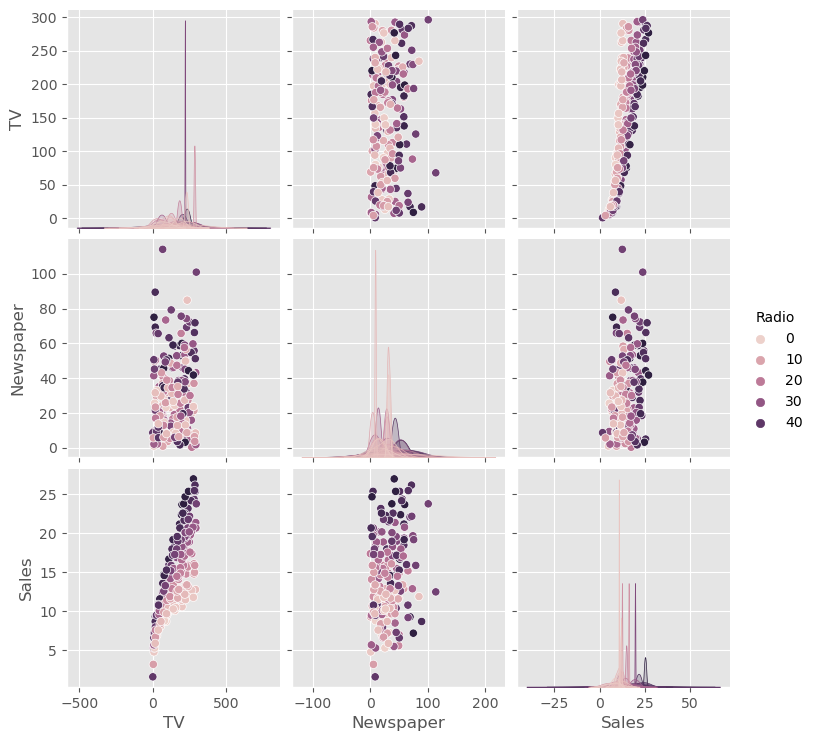

In [28]:
sns.pairplot(df,hue='Radio')

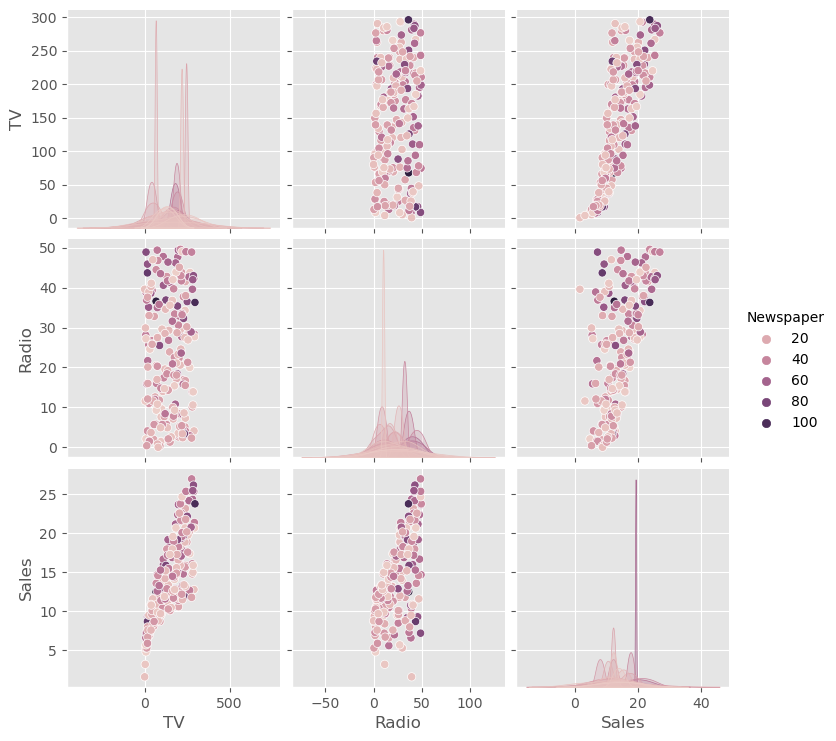

In [29]:
sns.pairplot(df,hue='Newspaper')

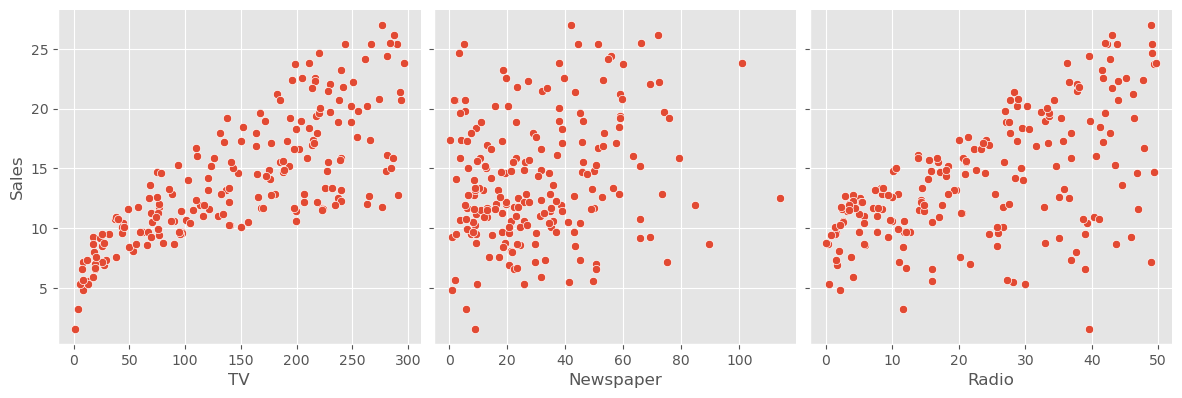

In [30]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

**JOINT PLOT**

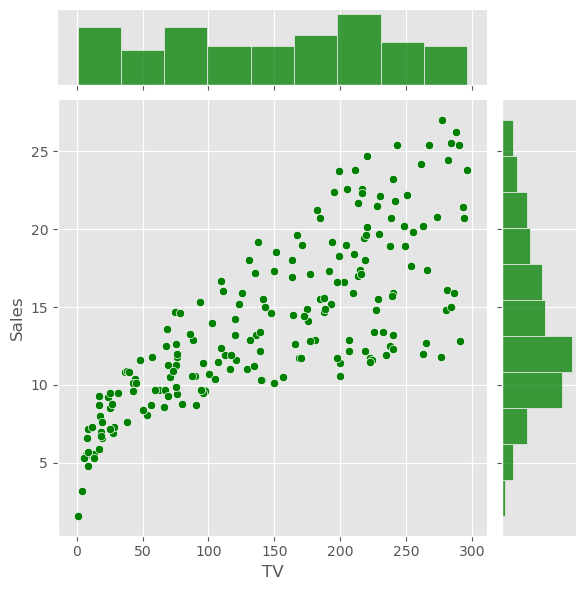

In [31]:
sns.jointplot(x = 'TV',y = 'Sales', data = df, color='green')

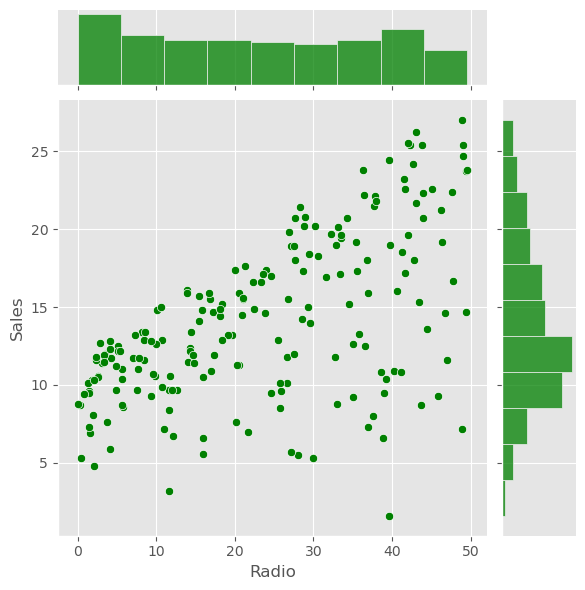

In [32]:
sns.jointplot(x = 'Radio',y = 'Sales', data = df, color='green')

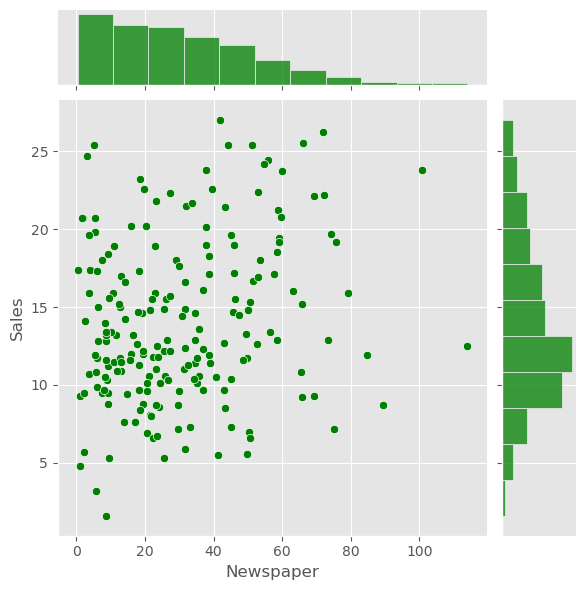

In [33]:
sns.jointplot(x = 'Newspaper',y = 'Sales', data = df, color='green')

**HISTOGRAM PLOT**

<Axes: xlabel='TV', ylabel='Count'>

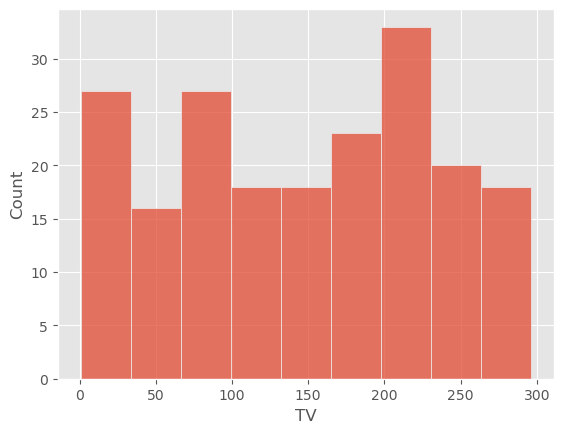

In [34]:
sns.histplot(df['TV'])

<Axes: xlabel='Newspaper', ylabel='Count'>

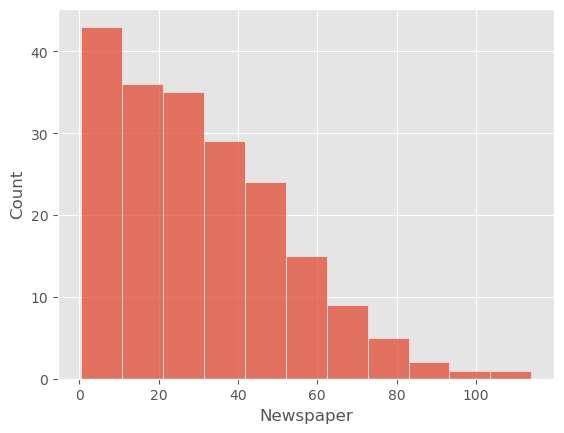

In [35]:
sns.histplot(df['Newspaper'])

<Axes: xlabel='Radio', ylabel='Count'>

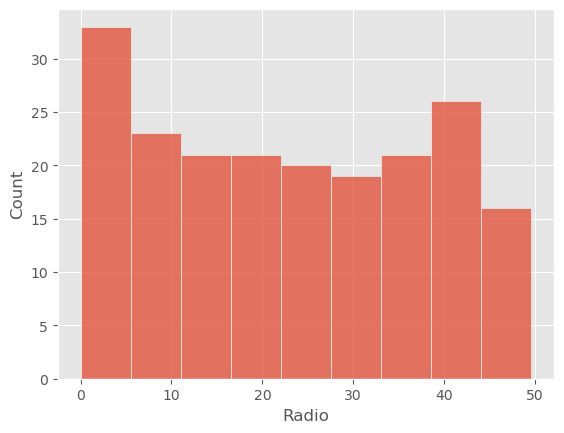

In [36]:
sns.histplot(df['Radio'])

<Axes: xlabel='Sales', ylabel='Count'>

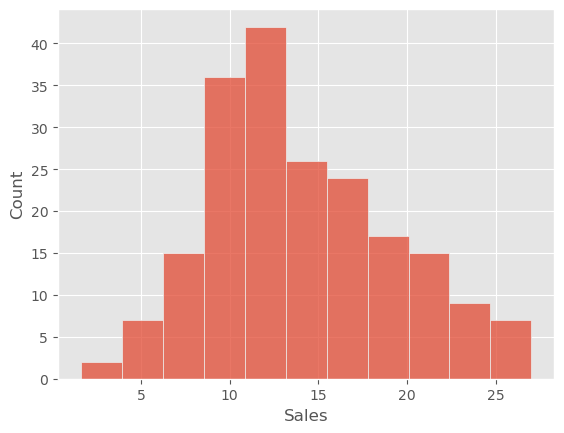

In [37]:
sns.histplot(df['Sales'])

**SCATTER PLOT**

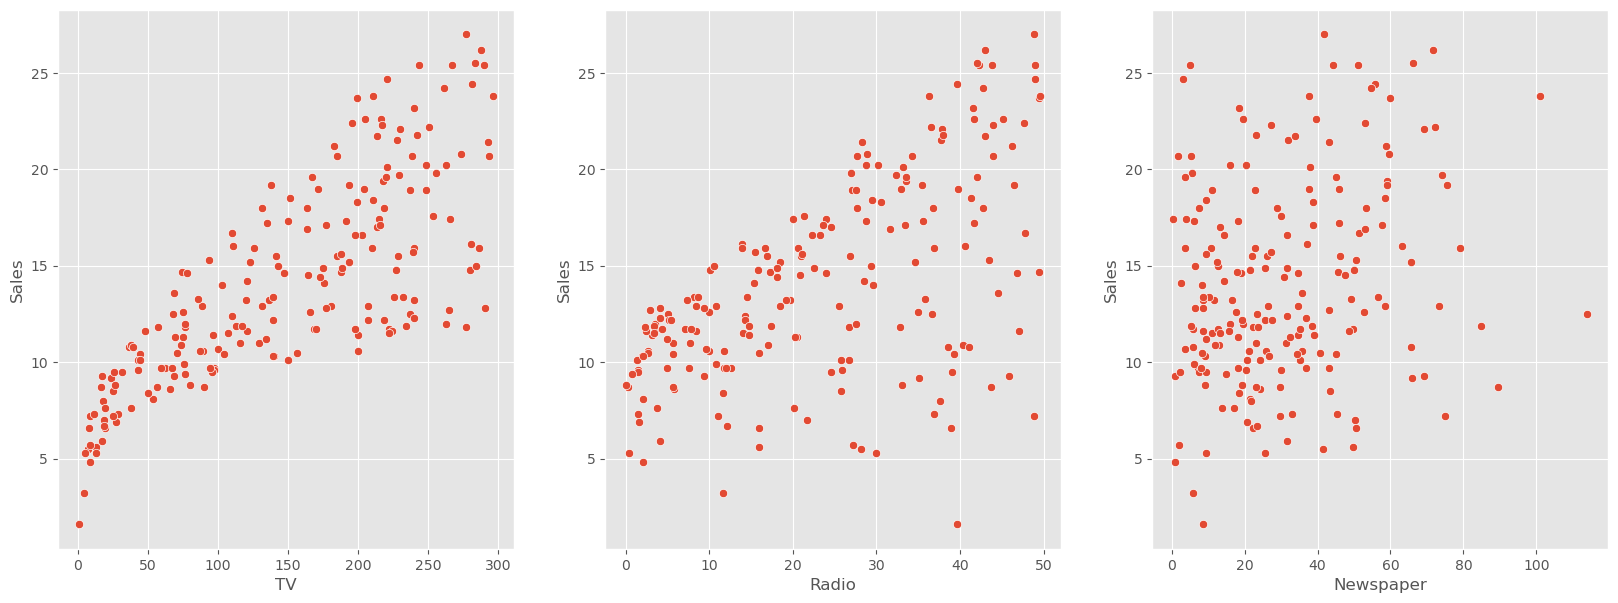

In [38]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.scatterplot(x='TV', y='Sales', data= df)

plt.subplot(1,3,2)
sns.scatterplot(x='Radio', y='Sales', data= df)

plt.subplot(1,3,3)
sns.scatterplot(x='Newspaper', y='Sales', data= df)
plt.show()

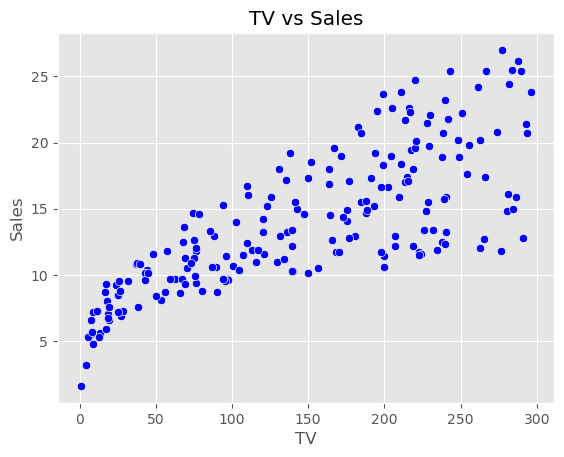

In [39]:
sns.scatterplot(data = df, x='TV', y='Sales', color = 'blue')
plt.title('TV vs Sales')
plt.show()

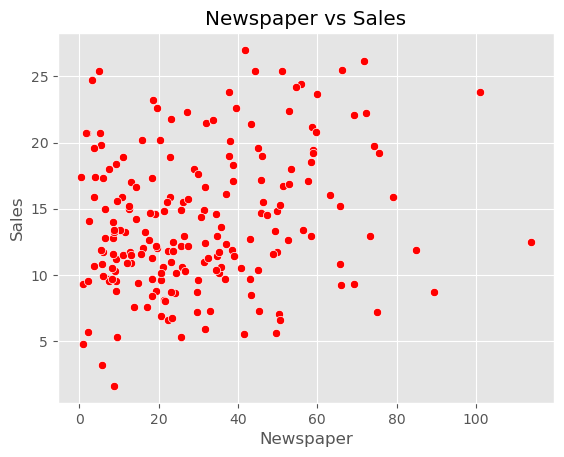

In [40]:
sns.scatterplot(data = df, x='Newspaper', y='Sales', color = 'red')
plt.title('Newspaper vs Sales')
plt.show()

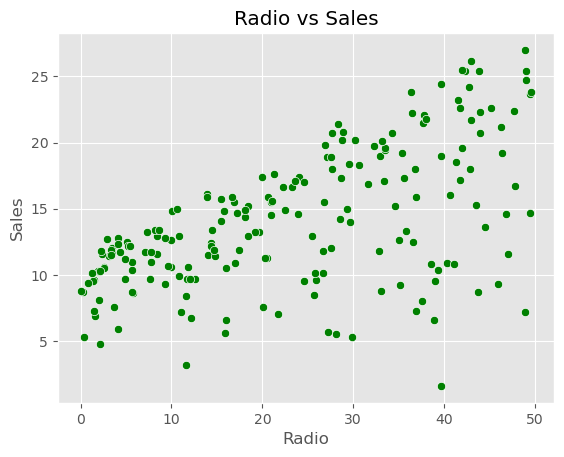

In [41]:
sns.scatterplot(data = df, x='Radio', y='Sales', color = 'green')
plt.title('Radio vs Sales')
plt.show()

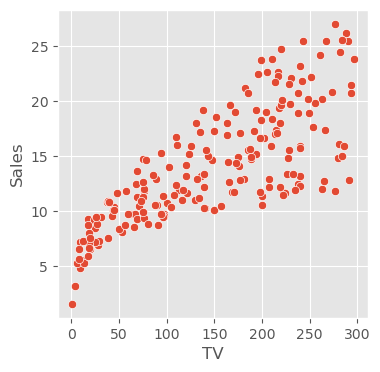

In [42]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

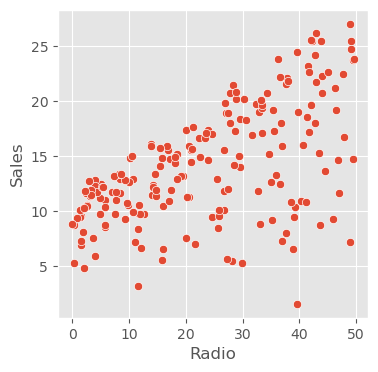

In [43]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

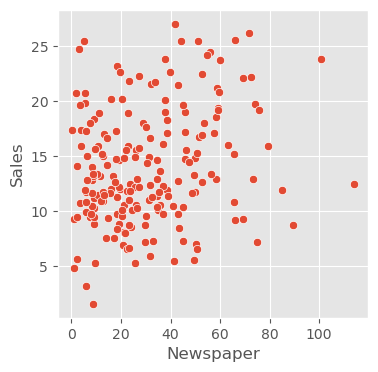

In [44]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()

In [45]:
#Splitting the datset into X,the attributes and y,the target variable
X=df.drop('Sales',axis=1)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [46]:
y=df['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [47]:
X.tail()

,TV,Radio,Newspaper
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [48]:
y.tail()

195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, dtype: float64

In [49]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [50]:
print('Training data shape of X and y respectively: ',X_train.shape,y_train.shape)
print('Testing data shape of X and y respectively: ',X_test.shape,y_test.shape)

Training data shape of X and y respectively:  (160, 3) (160,)
Testing data shape of X and y respectively:  (40, 3) (40,)


In [51]:
X_train.tail()

,TV,Radio,Newspaper
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5
172,19.6,20.1,17.0


In [52]:
y_test.tail()

189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: Sales, dtype: float64

In [53]:
# Checking the Dimensions of Training and Testing Data
print("The Shape of X_train dataset:", X_train.shape)
print("The Shape of X_test dataset:", X_test.shape)
print("The Shape of y_train dataset:", y_train.shape)
print("The Shape of y_test dataset:", y_test.shape)

The Shape of X_train dataset: (160, 3)
The Shape of X_test dataset: (40, 3)
The Shape of y_train dataset: (160,)
The Shape of y_test dataset: (40,)


In [54]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Linear Regression MSE:', mse_lr)

Linear Regression MSE: 4.402118291449685


In [55]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print('Decision Tree MSE:', mse_dt)

Decision Tree MSE: 1.47875


In [56]:
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest MSE:', mse_rf)

Random Forest MSE: 0.9213309499999998


In [57]:
print('Linear Regression R^2:', model_lr.score(X_test, y_test))
print('Decision Tree R^2:', model_dt.score(X_test, y_test))
print('Random Forest R^2:', model_rf.score(X_test, y_test))

Linear Regression R^2: 0.8601145185017868
Decision Tree R^2: 0.953009973365036
Random Forest R^2: 0.9707229985595154


In [58]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_pred_dt,y_test))
print('Root MeanSquare Error:',np.sqrt(metrics.mean_squared_error(y_pred_dt,y_test)))
print('R-Squared',metrics.r2_score(y_pred_dt,y_test))

Mean Absolute Error: 0.8225
Root MeanSquare Error: 1.216038650701531
R-Squared 0.9506696912581523


In [59]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_pred_lr,y_test))
print('Root MeanSquare Error:',np.sqrt(metrics.mean_squared_error(y_pred_lr,y_test)))
print('R-Squared',metrics.r2_score(y_pred_lr,y_test))

Mean Absolute Error: 1.3617813502090275
Root MeanSquare Error: 2.0981225634956804
R-Squared 0.8330284237692487


In [60]:
models = {'dt' : DecisionTreeRegressor(),
          'lr' : LinearRegression(),
          'random' : RandomForestRegressor()}

In [61]:
report = {}
for i in range(len(list(models))):
            model = list(models.values())[i]
            print(f"Model Training started with {model}")
            model.fit(X_train,y_train)
            print(f"Training completed successfully")
            y_test_pred = model.predict(X_test)
            print("Calculating score")
            test_model_score = r2_score(y_test, y_test_pred)
            print(f"Calculted score: {round(test_model_score*100,2)}% for {model}")
            print("=="*30)
            report[list(models.keys())[i]] = test_model_score

Model Training started with DecisionTreeRegressor()
Training completed successfully
Calculating score
Calculted score: 94.78% for DecisionTreeRegressor()
Model Training started with LinearRegression()
Training completed successfully
Calculating score
Calculted score: 86.01% for LinearRegression()
Model Training started with RandomForestRegressor()
Training completed successfully
Calculating score
Calculted score: 97.1% for RandomForestRegressor()


In [62]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_rf))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_rf))
print("R2_score:", metrics.r2_score(y_test, y_pred_rf))

MAE: 0.6767500000000005
MSE: 0.9213309499999998
R2_score: 0.9707229985595154
